In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix

iris = datasets.load_iris(as_frame=True)

In [ ]:
features, target = iris.data, iris.target
df = features
df['target'] = target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


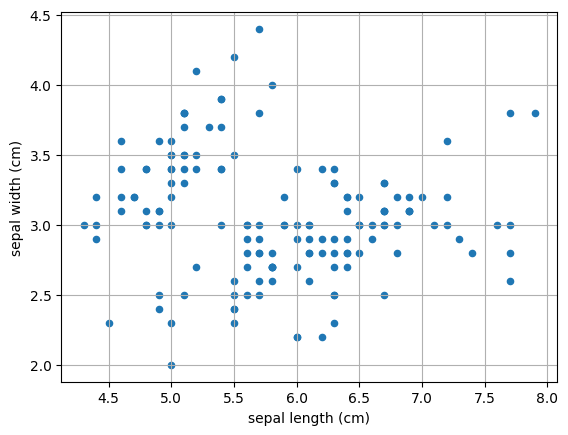

In [ ]:
df.plot(kind ="scatter",
          x ='sepal length (cm)',
          y ='sepal width (cm)')
plt.grid()

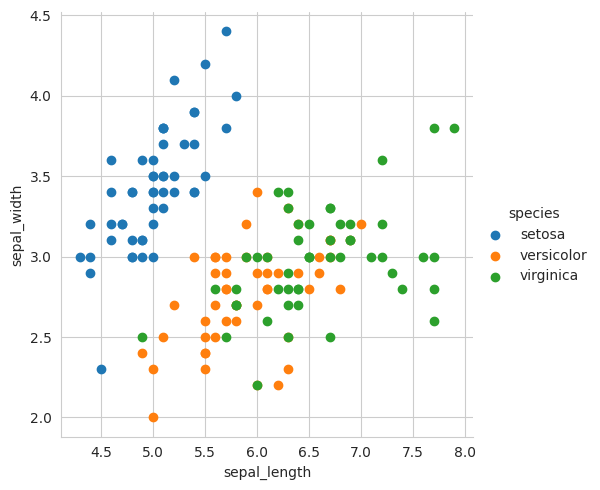

In [ ]:
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species",
              height = 5).map(plt.scatter,
                              'sepal_length',
                              'sepal_width').add_legend()

In [ ]:
class AdalineGD(object):

    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.random.rand(X.shape[1]) # weight
        self.b_ = np.random.rand() # bias
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * X.T.dot(errors)
            self.b_ += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
       """Calculate net input"""
       return np.dot(X, self.w_) + self.b_

    def activation(self, X):
       """Compute linear activation"""
       return self.net_input(X)
      #  return X
    def predict(self, X):
       """Return class label after unit step"""
       return np.where(self.activation(X) >= 0.0, 1, -1)

In [ ]:
df = df.sample(frac=1)

y = df.iloc[:,4].values
# y = 0 for Iris-setosa
y = np.where(y == 0, -1, 1)
X = df.iloc[:,[0,1,2,3]].values

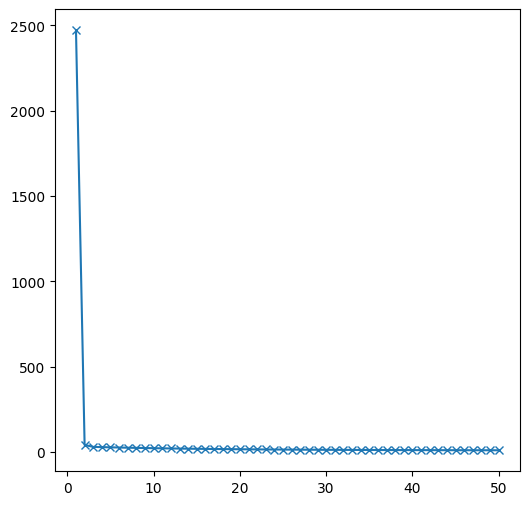

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))

ada1 = AdalineGD(n_iter=50,eta=0.0001).fit(X,y)
ax.plot(range(1,len(ada1.cost_) +1), (ada1.cost_),marker='x')
plt.show()

In [ ]:
print_matrics(ada1.predict(X), y)

[[ 50   0]
 [  0 100]]
Recall:  1.0
Precision:  1.0
Accuracy:  1.0


In [ ]:
y = df.iloc[:,4].values
y = np.where(y == 1, -1, 1)
X = df.iloc[:,[0,1,2,3]].values

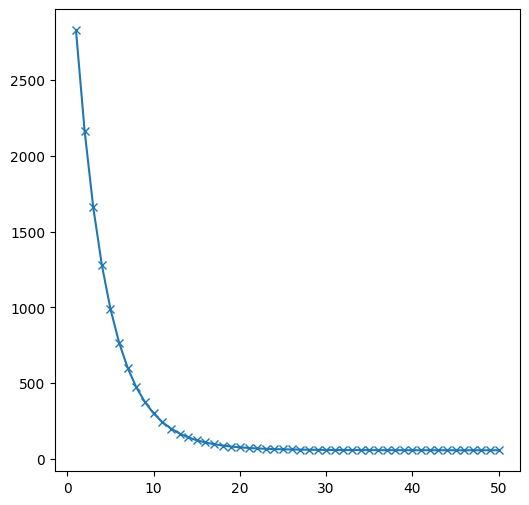

In [ ]:
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6))

ada2 = AdalineGD(n_iter=50,eta=0.0002).fit(X,y)
ax.plot(range(1,len(ada2.cost_) +1), (ada2.cost_),marker='x')
plt.show()

In [ ]:
print_matrics(ada2.predict(X), y)

[[ 7 43]
 [10 90]]
Recall:  0.14
Precision:  0.4117647058823529
Accuracy:  0.6466666666666666


In [ ]:
def print_matrics(y_pred,y):
  matrix = confusion_matrix(y, y_pred)
  print(matrix)
  true_pos = np.diag(matrix)
  false_pos = np.sum(matrix, axis=0) - true_pos
  false_neg = np.sum(matrix, axis=1) - true_pos
  true_neg = np.sum(matrix) - (true_pos + false_neg + false_pos)

  precision = (true_pos / (true_pos + false_pos))
  recall = (true_pos / (true_pos + false_neg))
  acc = ((true_pos + true_neg) / (true_pos + false_neg + false_pos + true_neg))

  print('Recall: ', recall[0])
  print('Precision: ', precision[0])
  print('Accuracy: ', acc[0])